In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Get Minute Data

In [11]:
x = pd.read_csv('HDFC.csv',index_col=0)['LAST_PRICE']
y = pd.read_csv('HDFCB.csv',index_col=0)['LAST_PRICE']    

df = pd.concat([y,x],axis=1, sort=True)
df.columns = ['HDFCB','HDFC']
df=df.fillna(method='ffill')
# print(len(x))
# print(len(y))
# print(len(df))
df.head()

,HDFCB,HDFC
01/01/18 09:07,1872.70,1710.00
01/01/18 09:14,1872.45,1710.50
01/01/18 09:15,1873.75,1707.30
01/01/18 09:16,1872.00,1706.15
01/01/18 09:17,1873.80,1703.50


## Find hedge ratio

In [12]:
import statsmodels.api as sm
model = sm.OLS(df.HDFCB.iloc[:90], df.HDFC.iloc[:90])
model = model.fit() 
print( model.params[0])

1.1011409522588353


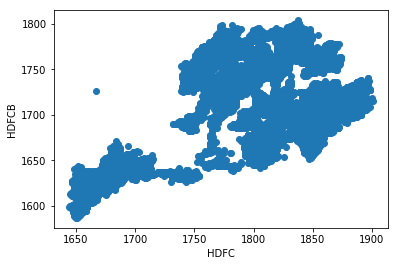

In [13]:
plt.scatter(df.HDFCB,df.HDFC)
plt.xlabel('HDFC')
plt.ylabel('HDFCB')
plt.show()

## Spread Visualization

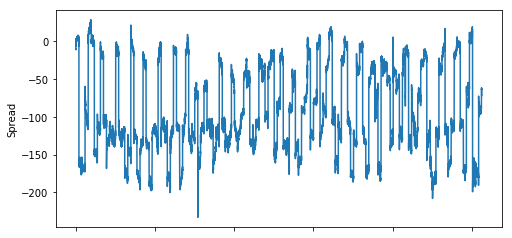

In [14]:
df['spread'] = df.HDFCB - model.params[0] * df.HDFC
# y - bx
# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [15]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)

## ADF Test 

In [16]:
adf[0]

-8.112736036498019

In [17]:
adf[4]

{'1%': -3.4304775676395223,
 '10%': -2.5668000104321704,
 '5%': -2.861596382307415}